# quantum circuit using IBM Quantum Experience

- import necessary libraries

In [4]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

- Part 1: Simulate a Basic Quantum Logic Gate (XOR)
   
   - An XOR gate can be created using a combination of CNOT and Hadamard gates.
   -  We will test the input |11> which should result in the output |01> (read from bottom up)
   - q0 is the control qubit, q1 is the target qubit.


In [5]:
# Create a quantum circuit with 2 qubits and 2 classical bits
xor_circuit = QuantumCircuit(2, 2)

In [6]:
# initialize the qubits to the state |11>

xor_circuit.x(0)
xor_circuit.x(1)
xor_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [7]:
# Apply the CNOT gate ( Controlled- X) - This flips the target qubit (q1) if the control qubit (q0) is 1.

xor_circuit.cx(0, 1)
xor_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [8]:
# Measure the qubits
xor_circuit.measure([0, 1],[0, 1])

# draw the cicuit
print("Quantum XOR Circuit for input |11>:")
print(xor_circuit)


Quantum XOR Circuit for input |11>:
     ┌───┐ ░       ░ ┌─┐   
q_0: ┤ X ├─░───■───░─┤M├───
     ├───┤ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ X ├─░─┤ X ├─░──╫─┤M├
     └───┘ ░ └───┘ ░  ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1 



Simulation Results (Input |11>:) {'01': 1024}


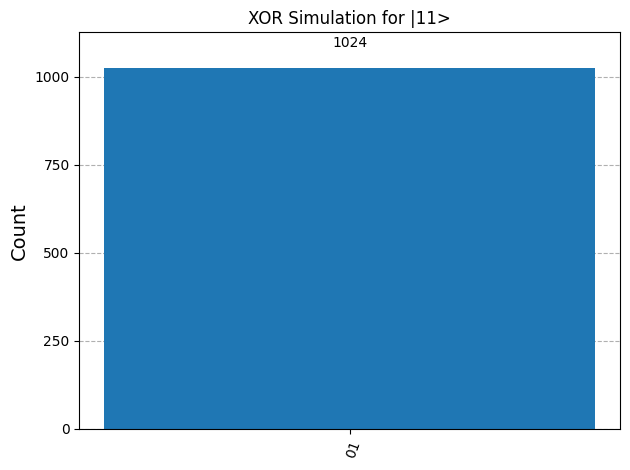

In [9]:
#Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(xor_circuit, simulator)
result = simulator.run(compiled_circuit, shots = 1024).result()
counts = result.get_counts(xor_circuit)

# print and plot the results

print("\nSimulation Results (Input |11>:)", counts)
# Expected output is '01' (q1=0, q0=1), but since we didn't un-flip q0, it remains 1.
# The CNOT correctly flipped q1 from 1 to 0. The state is now |10>.

plot_histogram(counts, title='XOR Simulation for |11>')

- Part 2: Explanation of Quantum Impact on AI (Grover's Search)

In [10]:
print("\n--- How Quantum Assists AI: Grover's Search ---")
print("""
Grover's Search is a quantum algorithm that provides a quadratic speedup for searching
an unstructured database. This has significant implications for AI and optimization tasks.

Problem: Imagine an AI task that involves finding the best solution out of N possible
solutions. A classical computer would, on average, have to check N/2 items.

Quantum Solution: Grover's algorithm can find the item in roughly sqrt(N) steps.

Example in AI for Drug Discovery:
- A database contains millions of molecular compounds (N is very large).
- An AI's task is to find a single compound that binds to a specific protein.
- Classically, this involves a slow, brute-force search.
- With Grover's Search, a quantum computer could identify the target compound
  dramatically faster, accelerating the initial phase of drug discovery.

This speedup applies to many AI problems, including:
- Optimizing complex machine learning models.
- Solving logistical and scheduling problems.
- Breaking cryptographic codes (a cybersecurity application of search).
""")

# Note: A full implementation of Grover's search is complex and beyond a simple demo,
# but the XOR gate above demonstrates the fundamental qubit manipulations that underpin it.


--- How Quantum Assists AI: Grover's Search ---

Grover's Search is a quantum algorithm that provides a quadratic speedup for searching
an unstructured database. This has significant implications for AI and optimization tasks.

Problem: Imagine an AI task that involves finding the best solution out of N possible
solutions. A classical computer would, on average, have to check N/2 items.

Quantum Solution: Grover's algorithm can find the item in roughly sqrt(N) steps.

Example in AI for Drug Discovery:
- A database contains millions of molecular compounds (N is very large).
- An AI's task is to find a single compound that binds to a specific protein.
- Classically, this involves a slow, brute-force search.
- With Grover's Search, a quantum computer could identify the target compound
  dramatically faster, accelerating the initial phase of drug discovery.

This speedup applies to many AI problems, including:
- Optimizing complex machine learning models.
- Solving logistical and scheduli